In [5]:
#Import these libraries first
import pandas as pd
import numpy as np
from datetime import date

In [6]:
#Load the Dataset

data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "First_Name": ["Alice", "Bob", "Charlie", "Alice", "Eve", "Frank", "George", "Hannah", "", "Ivan"],
    "Last_Name": ["Smith", "Brown", "Johnson", "Smith", "", "Miller", "White", "Davis", "", "Lee"],
    "Age": [25, 30, 35, 25, np.nan, -5, 45, 28, 40, 50],
    "City": ["New York", "Los Angeles", "Chicago", "New York", "San Francisco", "Miami", "", "Dallas", "Seattle", "Boston"],
    "Joined_Date": ["2021-01-15", "2021-01-20", "2021-03-01", "2021-01-15", "2021-06-30", "2021-12-01", "2021-09-10", "2021-09-15", "InvalidDate", "2021-11-20"],
    "Salary": [50000, None, 70000, 50000, 45000, 80000, 90000, -30000, 60000, 75000],
    "Gender": ["Female", "M", "Male", "Female", "Female", "Male", "M", "Female", None, "Male"]
}



In [7]:
#Create a DataFrame
df = pd.DataFrame(data)

In [8]:
#Display the original dataset
print("Original DataFrame:")
print(df)

Original DataFrame:
   ID First_Name Last_Name   Age           City  Joined_Date   Salary  Gender
0   1      Alice     Smith  25.0       New York   2021-01-15  50000.0  Female
1   2        Bob     Brown  30.0    Los Angeles   2021-01-20      NaN       M
2   3    Charlie   Johnson  35.0        Chicago   2021-03-01  70000.0    Male
3   4      Alice     Smith  25.0       New York   2021-01-15  50000.0  Female
4   5        Eve             NaN  San Francisco   2021-06-30  45000.0  Female
5   6      Frank    Miller  -5.0          Miami   2021-12-01  80000.0    Male
6   7     George     White  45.0                  2021-09-10  90000.0       M
7   8     Hannah     Davis  28.0         Dallas   2021-09-15 -30000.0  Female
8   9                       40.0        Seattle  InvalidDate  60000.0    None
9  10       Ivan       Lee  50.0         Boston   2021-11-20  75000.0    Male


In [11]:
#This is the data cleaning stage
# Handle missing values
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())  # Fill missing Salary with mean
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age with median
df['City'] = df['City'].replace("", np.nan).fillna("Unknown")  # Replace empty City with 'Unknown'
df['First_Name'] = df['First_Name'].replace("", "Unknown")  # Replace empty First_Name with 'Unknown'
df['Last_Name'] = df['Last_Name'].replace("", "Unknown")  # Replace empty Last_Name with 'Unknown'

In [12]:
print(df)

   ID First_Name Last_Name   Age           City  Joined_Date        Salary  \
0   1      Alice     Smith  25.0       New York   2021-01-15  50000.000000   
1   2        Bob     Brown  30.0    Los Angeles   2021-01-20  54444.444444   
2   3    Charlie   Johnson  35.0        Chicago   2021-03-01  70000.000000   
3   4      Alice     Smith  25.0       New York   2021-01-15  50000.000000   
4   5        Eve   Unknown  30.0  San Francisco   2021-06-30  45000.000000   
5   6      Frank    Miller  -5.0          Miami   2021-12-01  80000.000000   
6   7     George     White  45.0        Unknown   2021-09-10  90000.000000   
7   8     Hannah     Davis  28.0         Dallas   2021-09-15 -30000.000000   
8   9    Unknown   Unknown  40.0        Seattle  InvalidDate  60000.000000   
9  10       Ivan       Lee  50.0         Boston   2021-11-20  75000.000000   

   Gender  
0  Female  
1       M  
2    Male  
3  Female  
4  Female  
5    Male  
6       M  
7  Female  
8    None  
9    Male  


In [13]:
# Check for duplicate IDs
duplicate_ids = df[df['ID'].duplicated()]
if duplicate_ids.empty:
    print("\nAll IDs are unique.")
else:
    print("\nDuplicate IDs found:")
    print(duplicate_ids)

# Drop logical duplicates based on specific columns
df.drop_duplicates(subset=['First_Name', 'Last_Name', 'Age', 'City', 'Joined_Date', 'Salary', 'Gender'], inplace =True)


All IDs are unique.


In [14]:
print(df)

   ID First_Name Last_Name   Age           City  Joined_Date        Salary  \
0   1      Alice     Smith  25.0       New York   2021-01-15  50000.000000   
1   2        Bob     Brown  30.0    Los Angeles   2021-01-20  54444.444444   
2   3    Charlie   Johnson  35.0        Chicago   2021-03-01  70000.000000   
4   5        Eve   Unknown  30.0  San Francisco   2021-06-30  45000.000000   
5   6      Frank    Miller  -5.0          Miami   2021-12-01  80000.000000   
6   7     George     White  45.0        Unknown   2021-09-10  90000.000000   
7   8     Hannah     Davis  28.0         Dallas   2021-09-15 -30000.000000   
8   9    Unknown   Unknown  40.0        Seattle  InvalidDate  60000.000000   
9  10       Ivan       Lee  50.0         Boston   2021-11-20  75000.000000   

   Gender  
0  Female  
1       M  
2    Male  
4  Female  
5    Male  
6       M  
7  Female  
8    None  
9    Male  


In [84]:
#Handle Invalid Data
#Convert Joined_Date to datetime format
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'], errors='coerce')

In [85]:
# Handle negative values in Age column
df['Age'] = df['Age'].apply(lambda x: x if x > 0 else np.nan).fillna(df['Age'].median())

In [86]:
# Handle negative values in Salary column
df['Salary'] = df['Salary'].apply(lambda x: x if x >= 0 else np.nan).fillna(df['Salary'].mean())

In [22]:
# Standardize Gender values
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'}).fillna("Unknown")

In [23]:
# Scenario 1: Normalize text columns (e.g., First_Name, Last_Name)
df['First_Name'] = df['First_Name'].str.strip().str.title()  # Remove leading/trailing spaces and capitalize
df['Last_Name'] = df['Last_Name'].str.strip().str.title()

In [24]:
#Feauture Engineering 
#Combine First_Name and Last_Name into Full_Name
df['Full_Name'] = df['First_Name'] + " " + df['Last_Name']

In [25]:
# Create an Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60], labels=['Youth', 'Adult', 'Senior'])

In [26]:
print(df)

   ID First_Name Last_Name   Age           City Joined_Date        Salary  \
0   1      Alice     Smith  25.0       New York  2021-01-15  50000.000000   
1   2        Bob     Brown  30.0    Los Angeles  2021-01-20  54444.444444   
2   3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.000000   
4   5        Eve   Unknown  30.0  San Francisco  2021-06-30  45000.000000   
5   6      Frank    Miller  30.0          Miami  2021-12-01  80000.000000   
6   7     George     White  45.0        Unknown  2021-09-10  90000.000000   
7   8     Hannah     Davis  28.0         Dallas  2021-09-15  54938.271605   
8   9    Unknown   Unknown  40.0        Seattle  2025-01-06  60000.000000   
9  10       Ivan       Lee  50.0         Boston  2021-11-20  75000.000000   

    Gender        Full_Name Age_Group  
0   Female      Alice Smith     Youth  
1     Male        Bob Brown     Adult  
2     Male  Charlie Johnson     Adult  
4   Female      Eve Unknown     Adult  
5     Male     Frank Miller  

In [27]:
# Convert Joined_Date to datetime format
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'], errors='coerce')

#  Extract Year from Joined_Date
df['Joined_Year'] = df['Joined_Date'].dt.year

In [28]:
print(df)

   ID First_Name Last_Name   Age           City Joined_Date        Salary  \
0   1      Alice     Smith  25.0       New York  2021-01-15  50000.000000   
1   2        Bob     Brown  30.0    Los Angeles  2021-01-20  54444.444444   
2   3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.000000   
4   5        Eve   Unknown  30.0  San Francisco  2021-06-30  45000.000000   
5   6      Frank    Miller  30.0          Miami  2021-12-01  80000.000000   
6   7     George     White  45.0        Unknown  2021-09-10  90000.000000   
7   8     Hannah     Davis  28.0         Dallas  2021-09-15  54938.271605   
8   9    Unknown   Unknown  40.0        Seattle  2025-01-06  60000.000000   
9  10       Ivan       Lee  50.0         Boston  2021-11-20  75000.000000   

    Gender        Full_Name Age_Group  Joined_Year  
0   Female      Alice Smith     Youth         2021  
1     Male        Bob Brown     Adult         2021  
2     Male  Charlie Johnson     Adult         2021  
4   Female      E

In [30]:
# Save the cleaned dataset to a CSV file
df.to_csv(r'D:\College Course 2 PP\Python\saburifirstcleaneddataset.csv', index = False) 

In [32]:
!pip install seaborn

In [49]:
#we first need to import these visualization libraries to be able to make use of it
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load the cleaned dataset
file_path = r"D:\College Course 2 PP\Python\saburifirstcleaneddataset.csv"

In [35]:
df = pd.read_csv(file_path)   #this will read the cleaned csv file that was saved and store it in df now to be used for analysis

In [51]:
print(df)

   ID First_Name Last_Name   Age           City Joined_Date        Salary  \
0   1      Alice     Smith  25.0       New York  2021-01-15  50000.000000   
1   2        Bob     Brown  30.0    Los Angeles  2021-01-20  54444.444444   
2   3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.000000   
3   5        Eve   Unknown  30.0  San Francisco  2021-06-30  45000.000000   
4   6      Frank    Miller  30.0          Miami  2021-12-01  80000.000000   
5   7     George     White  45.0        Unknown  2021-09-10  90000.000000   
6   8     Hannah     Davis  28.0         Dallas  2021-09-15  54938.271605   
7   9    Unknown   Unknown  40.0        Seattle  2025-01-06  60000.000000   
8  10       Ivan       Lee  50.0         Boston  2021-11-20  75000.000000   

    Gender        Full_Name Age_Group  Joined_Year  
0   Female      Alice Smith     Youth         2021  
1     Male        Bob Brown     Adult         2021  
2     Male  Charlie Johnson     Adult         2021  
3   Female      E

C:\Users\e1ure\AppData\Local\Temp\ipykernel_21068\821130053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


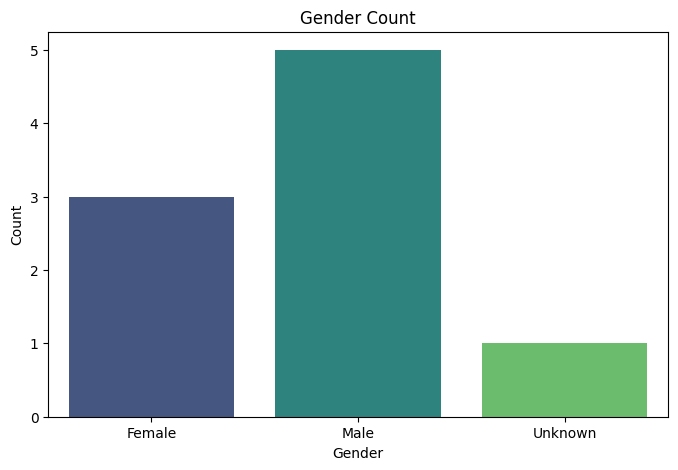

In [87]:
# Gender Count Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\e1ure\AppData\Local\Temp\ipykernel_21068\4065564568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, palette='muted', order=['Youth', 'Adult', 'Senior'])


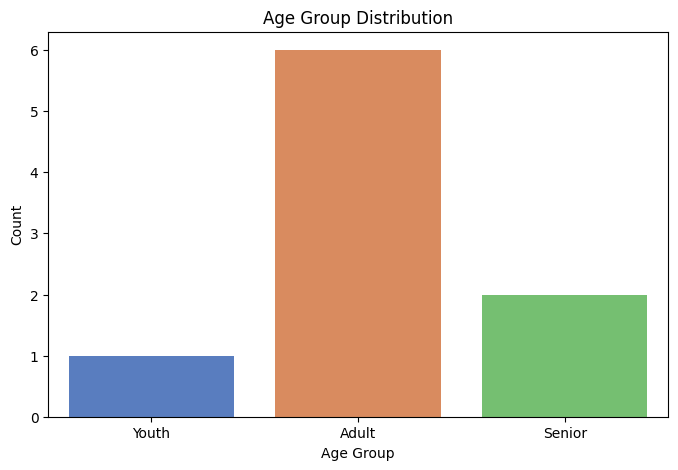

In [88]:
# 4. Bar Chart -  Age Group Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', data=df, palette='muted', order=['Youth', 'Adult', 'Senior'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

C:\Users\e1ure\AppData\Local\Temp\ipykernel_21068\1954388434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Salary', data=top_cities, palette='Blues_d')


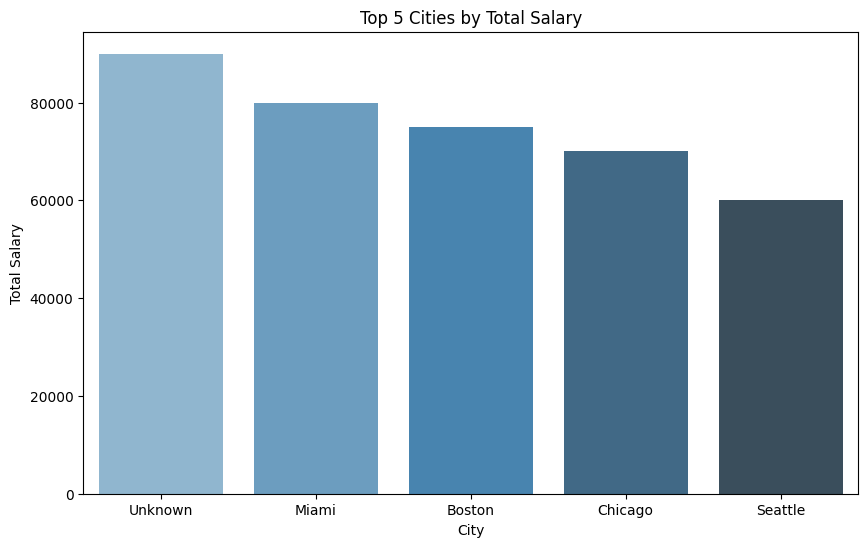

In [89]:
# Top 5 Cities by Salary Sum
top_cities = df.groupby('City')['Salary'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Salary', data=top_cities, palette='Blues_d')
plt.title('Top 5 Cities by Total Salary')
plt.xlabel('City')
plt.ylabel('Total Salary')
plt.show()